# Problema del negocio
#### Como responsable de ventas, necesito obtener una comprensión más profunda de los factores que influyen en el valor y el rendimiento de nuestros autos usados. El objetivo es identificar oportunidades de mercado y optimizar nuestra estrategia de precios.

#### Para ello, solicito que se realicen los siguientes análisis:
#### Identificación de los modelos más rentables: Necesito saber qué fabricantes y modelos tienen el mayor precio de venta promedio. Esto nos permitirá centrar nuestros esfuerzos de adquisición en los vehículos más valiosos.
#### 
#### Análisis del impacto del kilometraje y la antigüedad: Es crucial entender cómo el kilometraje y el año de fabricación afectan el precio final. Quiero confirmar si, a mayor kilometraje o antigüedad, el precio disminuye, y en qué medida.
#### 
#### Influencia del motor y el combustible: Me interesa saber si existe una correlación entre el tamaño del motor y el tipo de combustible con el precio de los vehículos. Esto nos ayudaría a identificar qué tipos de autos tienen mayor demanda y valor.

#### El análisis de estos puntos nos proporcionará información crucial para tomar decisiones informadas sobre la compra y venta de autos, ayudándonos a maximizar nuestros beneficios.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('../../data/raw/car_sales/car_sales_data.csv')

In [3]:
print(data.shape)
data.head()

(50053, 7)


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300.0,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850.0,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190.0,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814.0,1705
4,VW,Polo,1.0,Petrol,2006,127869.0,4101


In [4]:
data.describe()

,Year of manufacture,Mileage
count,50053.000000,50051.000000
mean,2004.216111,112482.653014
std,9.648509,71634.859815
min,1984.000000,630.000000
25%,1996.000000,54345.000000
50%,2004.000000,100929.000000
75%,2012.000000,158581.000000
max,2030.000000,453537.000000


In [5]:
columns = {
    'Manufacturer': 'Fabricante',
    'Model': 'Modelo',
    'Engine size': 'Tamaño del Motor',
    'Fuel type': 'Tipo de Combustible',
    'Year of manufacture': 'Año de Fabricación',
    'Mileage': 'Kilometraje',
    'Price': 'Precio'
}
data = data.rename(columns=columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50053 entries, 0 to 50052
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           50053 non-null  object 
 1   Modelo               50053 non-null  object 
 2   Tamaño del Motor     50051 non-null  object 
 3   Tipo de Combustible  50053 non-null  object 
 4   Año de Fabricación   50053 non-null  int64  
 5   Kilometraje          50051 non-null  float64
 6   Precio               50051 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.7+ MB


# Limpieza de datos

# Inicialmente
- Datos faltantes en algunas celdas
- Columnas irrelevantes
- Registros repetidos
- Valores extremos (outliers)
- Errores tipográficos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50053 entries, 0 to 50052
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           50053 non-null  object 
 1   Modelo               50053 non-null  object 
 2   Tamaño del Motor     50051 non-null  object 
 3   Tipo de Combustible  50053 non-null  object 
 4   Año de Fabricación   50053 non-null  int64  
 5   Kilometraje          50051 non-null  float64
 6   Precio               50051 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.7+ MB


## Eliminar datos faltantes, interpolar con datos vecinos, entre otros
En este caso como son pocos registros con datos faltantes se podrían eliminar

In [7]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50047 entries, 0 to 50052
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           50047 non-null  object 
 1   Modelo               50047 non-null  object 
 2   Tamaño del Motor     50047 non-null  object 
 3   Tipo de Combustible  50047 non-null  object 
 4   Año de Fabricación   50047 non-null  int64  
 5   Kilometraje          50047 non-null  float64
 6   Precio               50047 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.1+ MB


In [8]:
columnas_categoricas = ['Fabricante', 'Modelo', 'Tamaño del Motor', 'Tipo de Combustible']

for col in columnas_categoricas:
  print(f'Valores únicos en {col}: {data[col].nunique()}')

Valores únicos en Fabricante: 14
Valores únicos en Modelo: 32
Valores únicos en Tamaño del Motor: 17
Valores únicos en Tipo de Combustible: 5


In [9]:
import sys
import os
sys.path.append(os.path.abspath('../../'))  # Ajusta la ruta si es necesario

from src.transformar_precio import TransformarPrecio
from src.transformar_kilometraje import TransformarKilometraje

columna_precio = 'Precio'
transformador = TransformarPrecio()
data[columna_precio] = data[columna_precio].apply(transformador.transformar)

columna_kilometraje = 'Kilometraje'
transformador_km = TransformarKilometraje()
data[columna_kilometraje] = data[columna_kilometraje].apply(lambda km: transformador_km.transformar(km, 'millas'))


In [10]:
data.describe()

,Año de Fabricación,Kilometraje,Precio
count,50047.000000,50047.000000,50047.000000
mean,2004.214538,181031.352062,13833.494185
std,9.647969,115285.094212,16415.645369
min,1984.000000,1013.884200,10.500000
25%,1996.000000,87464.410320,3061.500000
50%,2004.000000,162445.170260,7978.000000
75%,2012.000000,255217.183900,19040.000000
max,2030.000000,729895.235580,168081.000000


In [11]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50007 entries, 0 to 50052
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           50007 non-null  object 
 1   Modelo               50007 non-null  object 
 2   Tamaño del Motor     50007 non-null  object 
 3   Tipo de Combustible  50007 non-null  object 
 4   Año de Fabricación   50007 non-null  int64  
 5   Kilometraje          50007 non-null  float64
 6   Precio               50007 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.1+ MB


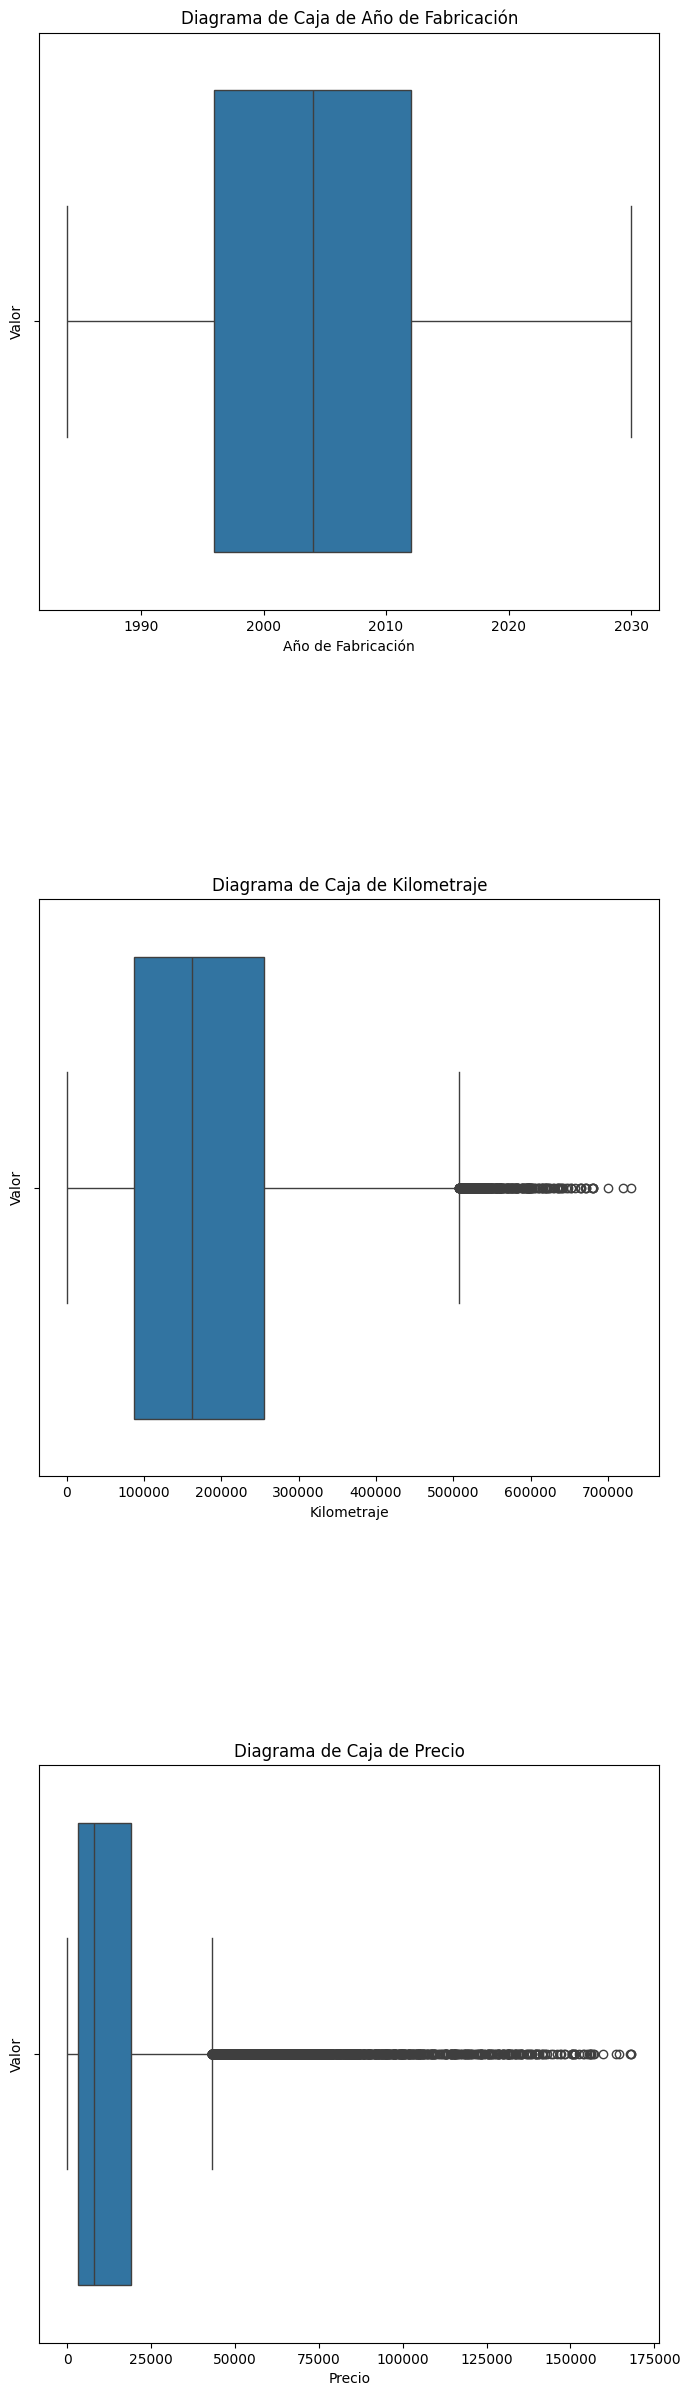

In [12]:
columnas_numericas = ['Año de Fabricación', 'Kilometraje', 'Precio']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_numericas):
  sns.boxplot(data=data, x=col, ax=axes[i])
  axes[i].set_title(f'Diagrama de Caja de {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Valor')
plt.show()

/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/3915777183.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/3915777183.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/3915777183.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/3915777183.py:7: UserWarning: set_ticklabels() should only be used with a fixed num

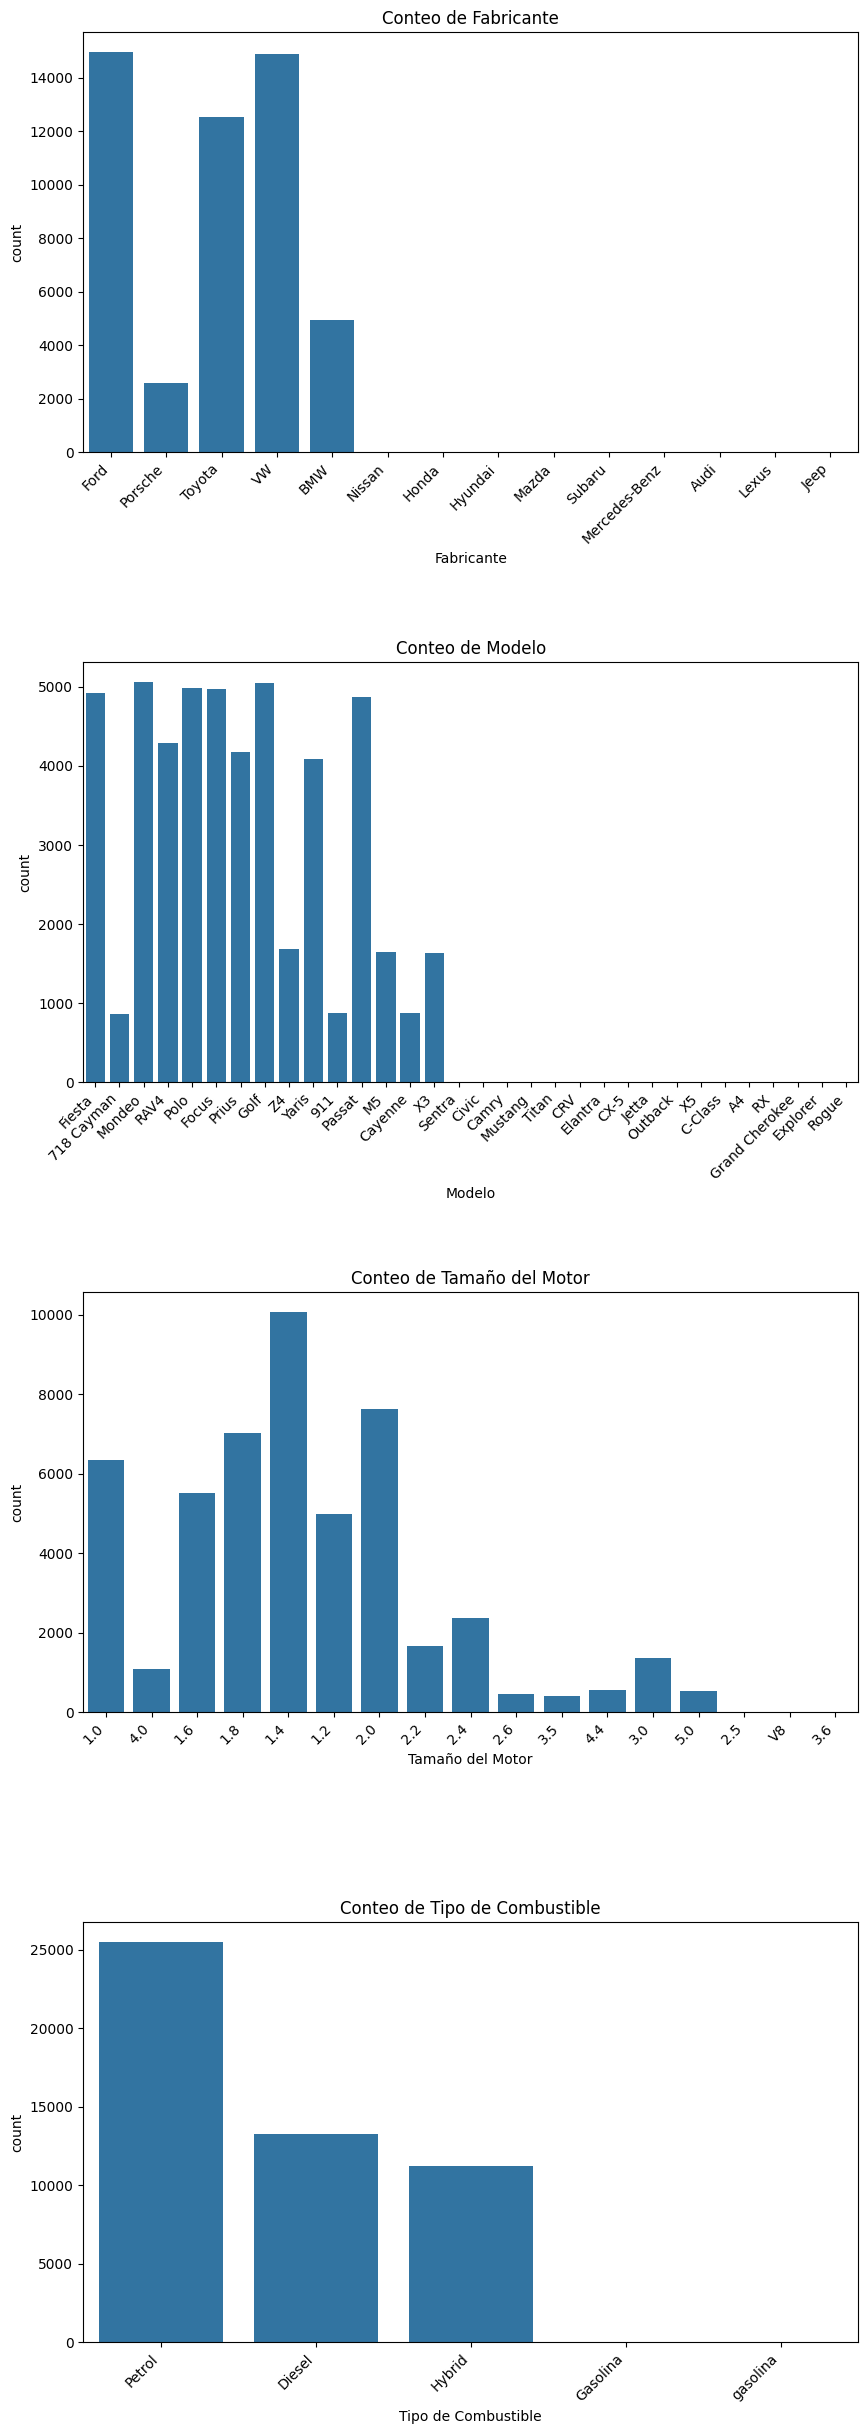

In [13]:
fig, ax = plt.subplots(nrows= 4,ncols=1,figsize=(10, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_categoricas):
  sns.countplot(data=data, x=col, ax=ax[i])
  ax[i].set_title(f'Conteo de {col}')
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
  

In [14]:
columnas_numericas = ['Año de Fabricación', 'Kilometraje', 'Precio']
columnas_categoricas = ['Fabricante', 'Modelo', 'Tamaño del Motor', 'Tipo de Combustible']

for col in columnas_categoricas:
  data[col] = data[col].str.replace(' ', '_').str.replace('-', '_').str.lower().str.strip()

/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/2765497351.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/2765497351.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/2765497351.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/2765497351.py:7: UserWarning: set_ticklabels() should only be used with a fixed num

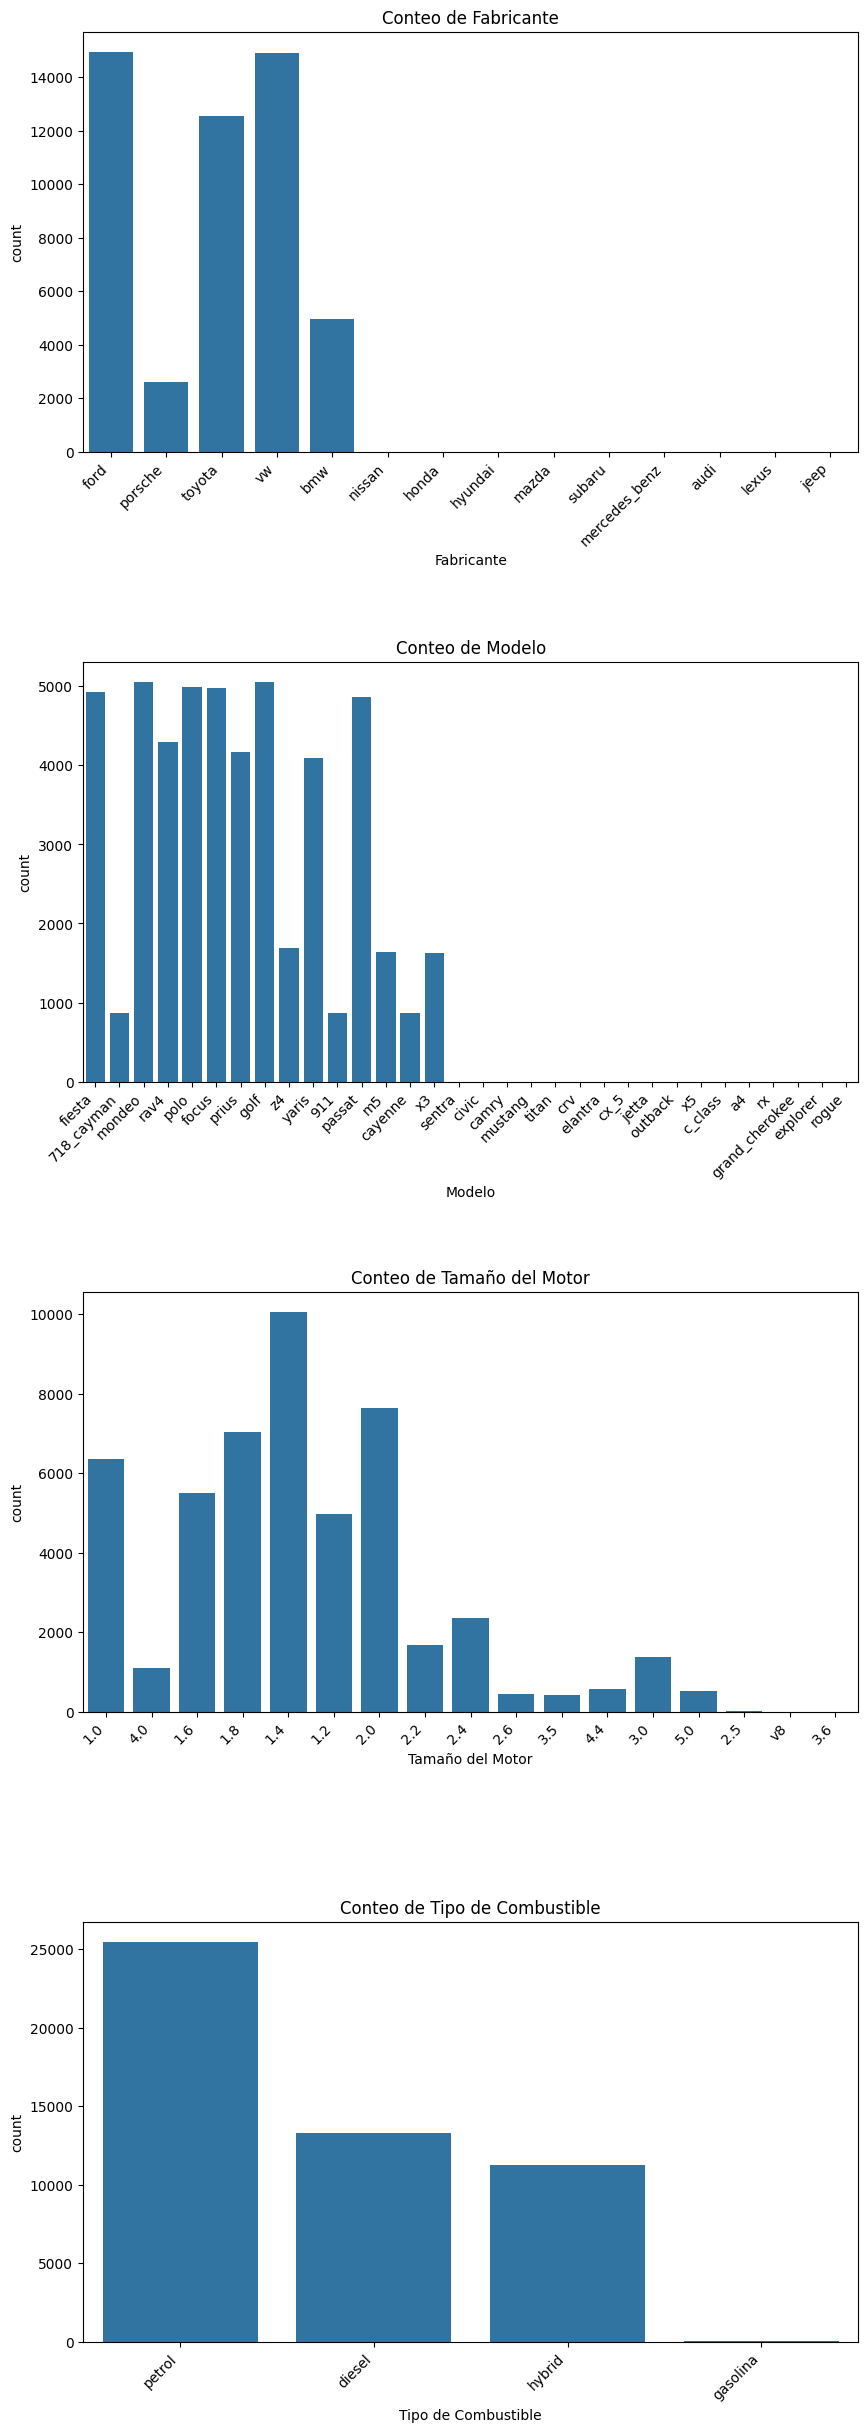

In [15]:
fig, ax = plt.subplots(nrows= 4,ncols=1,figsize=(10, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_categoricas):
  sns.countplot(data=data, x=col, ax=ax[i])
  ax[i].set_title(f'Conteo de {col}')
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
plt.show()

In [16]:
data.to_csv('../../data/clean/car_sales/car_sales_data_procesado.csv', index=False)

# Análisis exploratorio 
- Mapa mental del set de datos
- Encontrar partes de la respuesta a las preguntas


## Análisis univariado: Relación de cadad variable con la variable a predecir
## Análisis bivariado: Relación de pares de variables

/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/3000923525.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/3000923525.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/3000923525.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
/var/folders/53/zd9ykw0s3jscrccwcf6wk3ww0000gn/T/ipykernel_17924/3000923525.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or

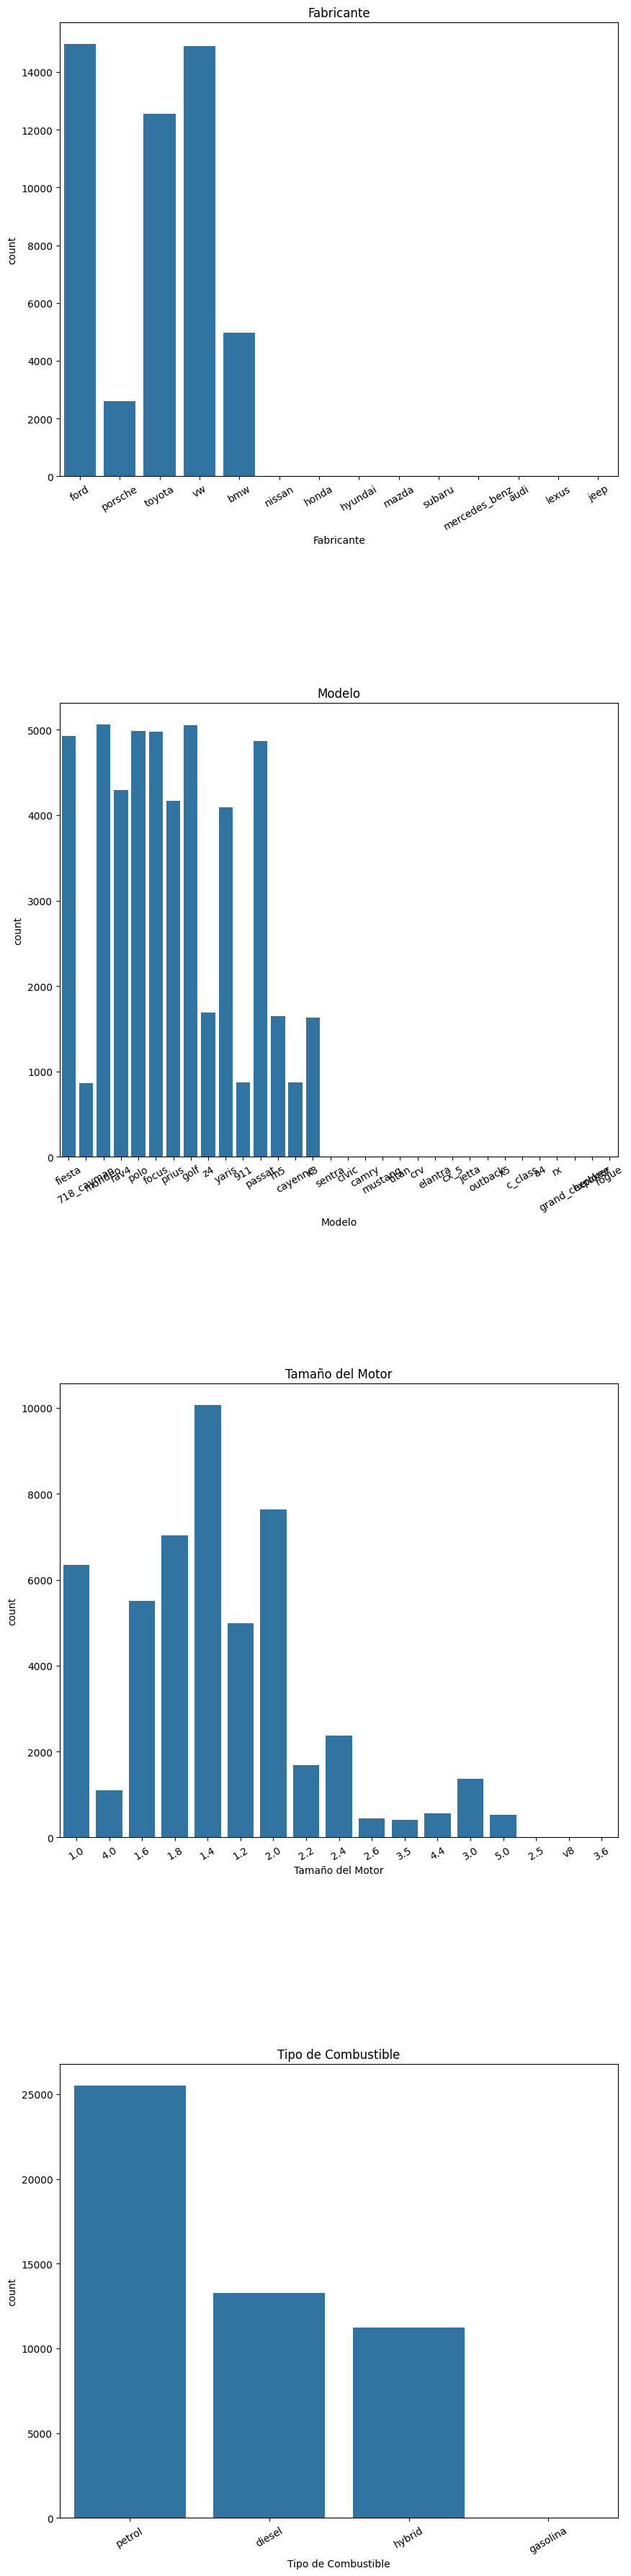

In [17]:
# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(columnas_categoricas), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_categoricas):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
plt.show()

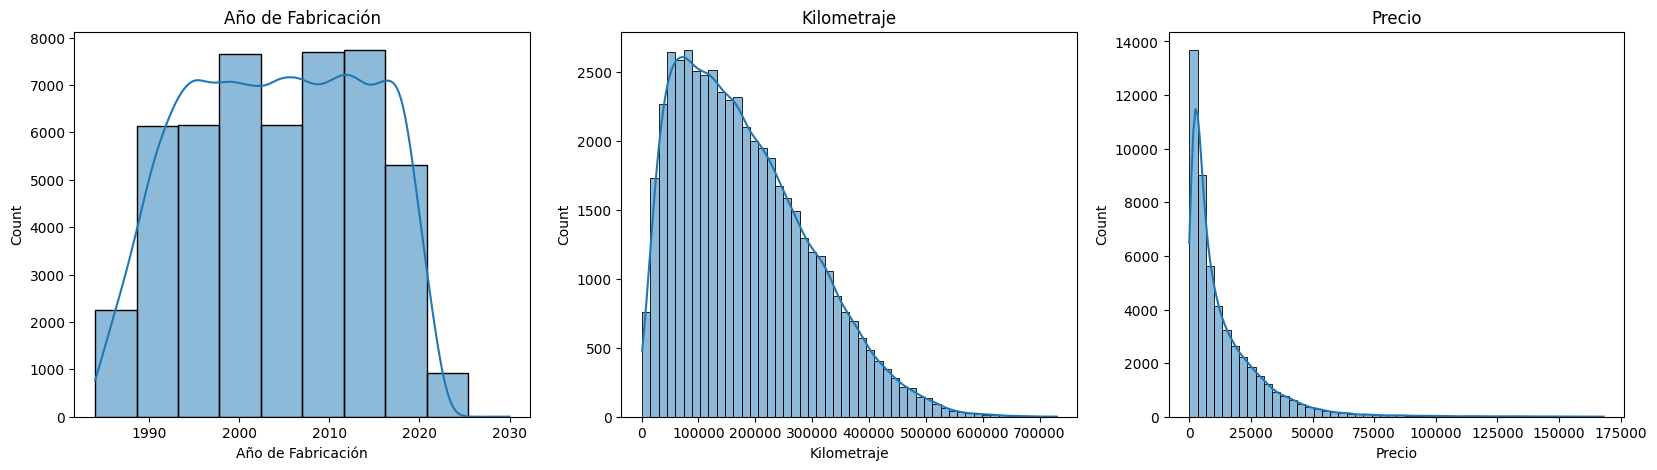

In [18]:
# Histogramas de las variables numéricas
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_numericas):
  if col == 'Año de Fabricación':
    nbins = 10
  else:
    nbins = 50
  sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde=True)
  ax[i].set_title(col)
plt.show()

#### Anotaciones
- En el Kilometraje se presenta un sesgo a la izquierda con 50K y 150K Km
- En Precio un sesgo a la izquierda de 0 a 10K
- Año de fabricación presenta una distribución algo asimétrica 

In [19]:
data['Año de Fabricación'].describe()

count    50007.00000
mean      2004.21443
std          9.64778
min       1984.00000
25%       1996.00000
50%       2004.00000
75%       2012.00000
max       2030.00000
Name: Año de Fabricación, dtype: float64

In [20]:
data["Kilometraje"].describe()

count     50007.000000
mean     181052.296713
std      115262.434777
min        1013.884200
25%       87487.745750
50%      162483.794420
75%      255230.863290
max      729895.235580
Name: Kilometraje, dtype: float64

In [21]:
data["Precio"].describe()

count     50007.000000
mean      13833.339482
std       16418.013709
min          10.500000
25%        3061.000000
50%        7975.000000
75%       19037.000000
max      168081.000000
Name: Precio, dtype: float64

# Análisis univariado

In [22]:
# modelo_rentable

precio_promedio = data['Precio'].mean()
def es_modelo_rentable(precio, precio_promedio=precio_promedio):
  return precio > precio_promedio

data['modelo_rentable'] = data['Precio'].apply(es_modelo_rentable)

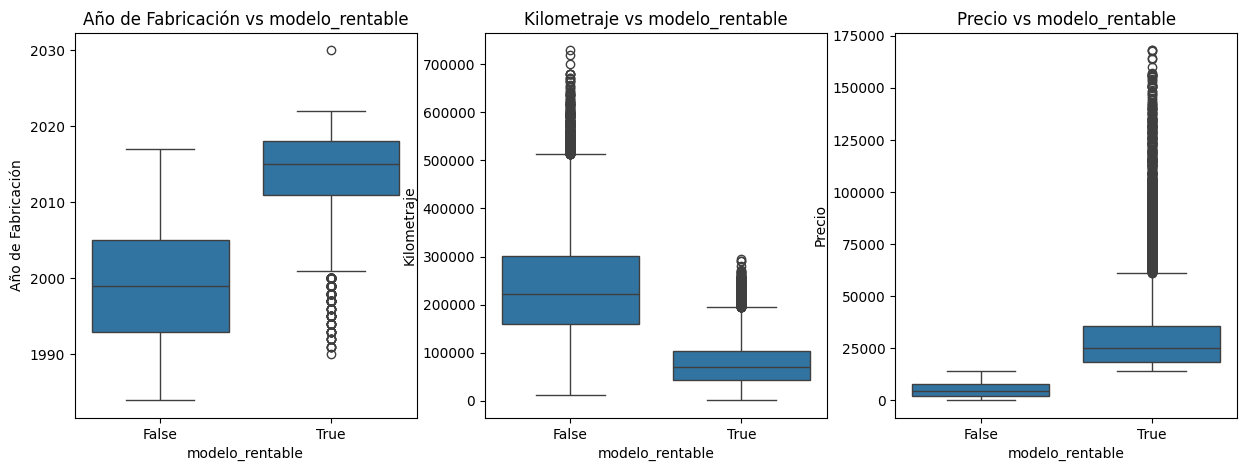

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.25)

for i, col in enumerate(columnas_numericas):
  bplt = sns.boxplot(x='modelo_rentable', y=col, data=data, ax=axes[i] )
  axes[i].set_title(f'{col} vs modelo_rentable')
  axes[i].set_xlabel('modelo_rentable')
  axes[i].set_ylabel(col)
plt.show()

## Observaciones
En las tres graficas se observa que ninguna comparte mediana, además de que sus intervalos tampoco lo hacen.

In [24]:
def graficar_tasa_rentabilidad(var_predictora, var_predecir, type='line', order=None):
  x, y = var_predictora, var_predecir

  # Generar agrupaciones (groupby), calcular tasa de rentabilidad (mean),
    # multiplicarla por 100 (mul(100))
  grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_rent').reset_index()

    # Y generar gráfica
  if type=='line': # Útil para rangos continuos
    plt.figure(figsize=(10,6))
    sns.lineplot(x=var_predictora, y='tasa_rent', data=grupo)
    plt.grid()
  elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
    plt.figure(figsize=(14,6))
    sns.barplot(x=var_predictora, y='tasa_rent', data=grupo, order=order)
    plt.grid()
  elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
    plt.figure(figsize=(10,6)) 
    sns.scatterplot(x=var_predictora, y='tasa_rent', data=grupo)
    plt.grid()
  plt.title(f'Tasa de rentabilidad por {var_predictora}')
  plt.ylabel('Tasa de rentabilidad (%)')
  plt.xlabel(var_predictora)
  plt.show()

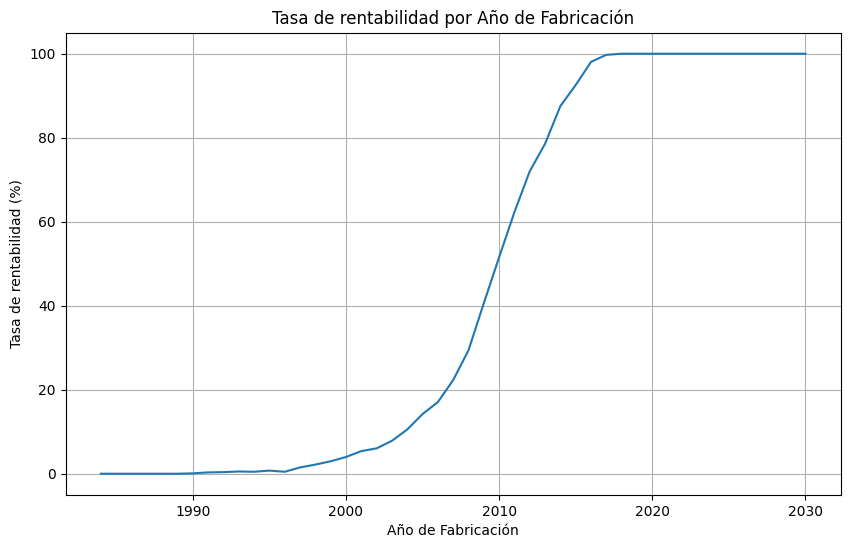

In [25]:
graficar_tasa_rentabilidad('Año de Fabricación', 'modelo_rentable', type='line')